# Assignment 18.4: Building and Training a Deep Learning Model - Section A

In [123]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Dense, Resizing, Rescaling, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [124]:
#force gpu to release memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
  except RuntimeError as e:
    print(e)

In [125]:
#load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train.shape

(60000, 28, 28)

In [126]:
y_train.shape

(60000,)

In [127]:
X_test.shape

(10000, 28, 28)

In [128]:
y_test.shape

(10000,)

In [129]:
X_train[0].shape

(28, 28)

In [130]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [131]:
CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

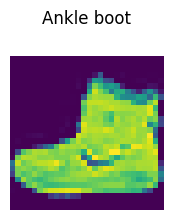

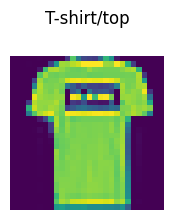

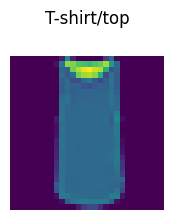

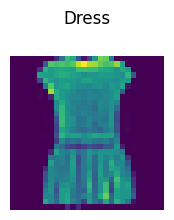

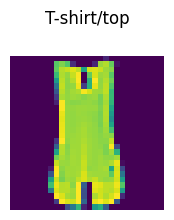

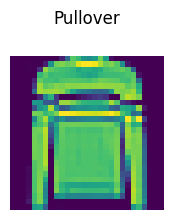

In [132]:
for i in range(6):
    #plt.figure(figsize=(3,3))
    _, ax = plt.subplots(figsize=(4,2))
    ax.matshow(X_train[i])
    plt.title(CLASS_NAMES[y_train[i]])
    plt.axis("off")

In [133]:
IMAGE_SIZE = 28
EPOCHS = 10

In [134]:
resize_and_scale = Sequential([
    Resizing(IMAGE_SIZE, IMAGE_SIZE),
    Rescaling(1.0/255)
])

In [135]:
input_shape = (10, IMAGE_SIZE, IMAGE_SIZE, 1)
model = Sequential([
    resize_and_scale,
    Conv2D(30, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(60, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Conv2D(20, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Flatten(),
    Dense(56, activation='relu'),
    Dense(len(CLASS_NAMES), activation='sigmoid')
])
model.build(input_shape=input_shape)


In [136]:
model.summary()

Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_34 (Sequential)      │ (10, 28, 28, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_72 (Conv2D)              │ (10, 26, 26, 30)       │           300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_72 (MaxPooling2D) │ (10, 13, 13, 30)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_73 (Conv2D)              │ (10, 11, 11, 60)       │        16,260 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_73 (MaxPooling2D) │ (10, 5, 5, 60)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_74 (Conv2D)              │ (10, 3, 3, 20)         │        10,820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_74 (MaxPooling2D) │ (10, 1, 1, 20)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_23 (Flatten)            │ (10, 20)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (10, 56)               │         1,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (10, 10)               │           570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,126 (113.77 KB)

 Trainable params: 29,126 (113.77 KB)

 Non-trainable params: 0 (0.00 B)

In [137]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [138]:
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=10
)

Epoch 1/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 54s 8ms/step - accuracy: 0.7158 - loss: 0.7701
Epoch 2/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 55s 9ms/step - accuracy: 0.8446 - loss: 0.4254
Epoch 3/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 65s 11ms/step - accuracy: 0.8666 - loss: 0.3654
Epoch 4/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 76s 13ms/step - accuracy: 0.8776 - loss: 0.3311
Epoch 5/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 80s 13ms/step - accuracy: 0.8860 - loss: 0.3098
Epoch 6/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 72s 12ms/step - accuracy: 0.8962 - loss: 0.2817
Epoch 7/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 72s 10ms/step - accuracy: 0.8974 - loss: 0.2756
Epoch 8/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 58s 10ms/step - accuracy: 0.9068 - loss: 0.2582
Epoch 9/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 63s 11ms/step - accuracy: 0.9080 - loss: 0.2516
Epoch 10/10
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 61s 10ms/step - accuracy: 0.9117 - loss: 0.2413


In [139]:
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy is: ", accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.8842 - loss: 0.3456
Accuracy is:  0.882099986076355


Text(0.5, 1.0, 'Training Accuracy and Loss')

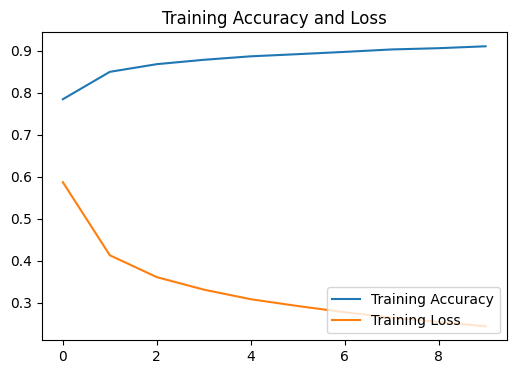

In [140]:
acc = history.history['accuracy']
loss = history.history['loss']
plt.figure(figsize=(6,4))
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.legend(loc='lower right')
plt.title('Training Accuracy and Loss')

In [141]:
top5 = X_test[:5]
y_pred=model.predict(top5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 346ms/step


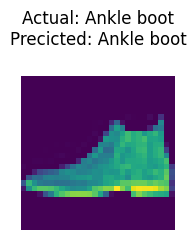

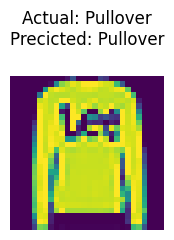

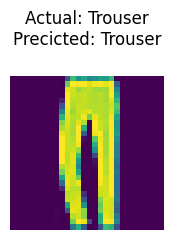

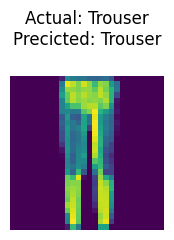

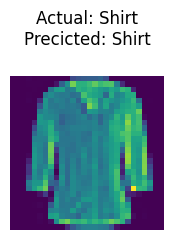

In [142]:
for i in range(len(top5)):
    _, ax = plt.subplots(figsize=(4,2))
    ax.matshow(top5[i])
    actual_class=CLASS_NAMES[y_test[i]]
    predicted_class=CLASS_NAMES[np.argmax(y_pred[i])]
    plt.title(f'Actual: {actual_class}\nPrecicted: {predicted_class}')
    plt.axis("off")